# Visualization (Part 7): Pandas plot

In this notebook, you will learn basic pandas plots
 
Link: https://github.com/itsmeale/pandas-plotting-examples/blob/master/README.md

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# time series
time_series = pd.DataFrame(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
time_series = time_series.cumsum()

In [3]:
print (time_series.head(), "\n")

                   0
2000-01-01 -0.849744
2000-01-02 -2.031159
2000-01-03 -1.715532
2000-01-04 -2.045176
2000-01-05 -4.097587 



In [4]:
# generic dataset
ds = pd.DataFrame({'A':np.random.randn(10000), 
                   'B':np.random.randn(10000), 
                   'C':np.random.randn(10000), 
                   'D':np.random.randn(10000)*3})

ds_cumsum = ds.cumsum() # cumulative sum of generic dataset
ds_cumsum['index'] = list(range(len(ds_cumsum)))
small_ds = ds.sample(10) # small sample of generic dataset

print (ds.head(), "\n")
print (ds_cumsum.head(), "\n")

          A         B         C         D
0 -0.766969 -0.150128  0.075013  2.413188
1 -0.383857  0.290132  2.824647 -1.559498
2 -0.407132 -1.099710  0.572045  0.138422
3 -0.737415 -0.888443 -0.078060  1.490932
4  1.464694  0.247244  0.278985  3.626184 

          A         B         C         D  index
0 -0.766969 -0.150128  0.075013  2.413188      0
1 -1.150826  0.140005  2.899660  0.853690      1
2 -1.557958 -0.959705  3.471706  0.992112      2
3 -2.295373 -1.848148  3.393646  2.483044      3
4 -0.830679 -1.600904  3.672631  6.109228      4 



In [5]:
# ds with only natural numbers
A = np.random.randint(0, 100, 100)
B = np.random.randint(0, 100, 100)
C = np.random.randint(0, 100, 100)

ds_natural = pd.DataFrame({'A':A,'B':B,'C':C})
print (ds_natural.head(), "\n")

ds_natural_cumsum = ds_natural.cumsum()
ds_natural_small = ds_natural.sample(10)

print (ds_natural_cumsum.head())

    A   B   C
0  47  46  42
1  10   4  90
2   1  14  27
3   1  20  14
4  55  93  59 

     A    B    C
0   47   46   42
1   57   50  132
2   58   64  159
3   59   84  173
4  114  177  232


A   -0.407132
B   -1.099710
C    0.572045
D    0.138422
Name: 2, dtype: float64


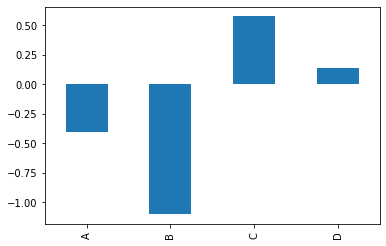

In [16]:
# Bar plots
#### Vertical Bar blots
print(ds.iloc[2]) # second row

ds.iloc[2].plot.bar() 

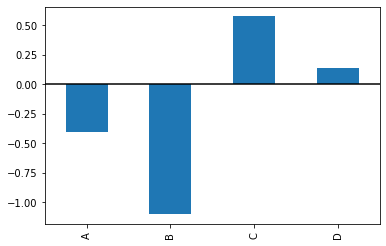

In [7]:
plt.figure()
ds.iloc[2].plot.bar()
plt.axhline(0, color='k')

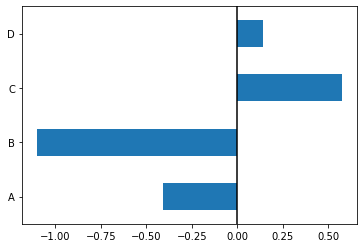

In [8]:
#### Horizontal Bar Plots
plt.figure()
ds.iloc[2].plot.barh()
plt.axvline(0, color='k') # for vertical lines use axvline

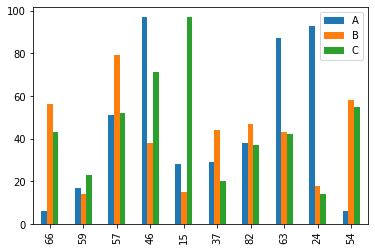

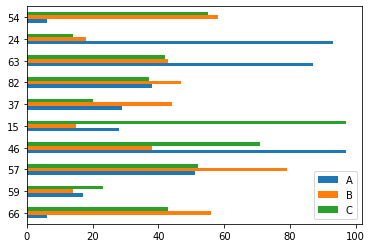

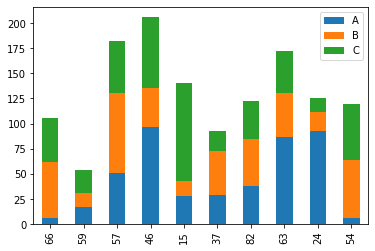

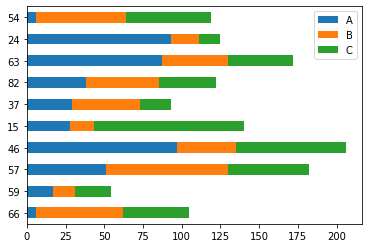

In [9]:
#### Another examples of barplots
ds_natural_small.plot.bar()
ds_natural_small.plot.barh()
ds_natural_small.plot.bar(stacked=True)
ds_natural_small.plot.barh(stacked=True)

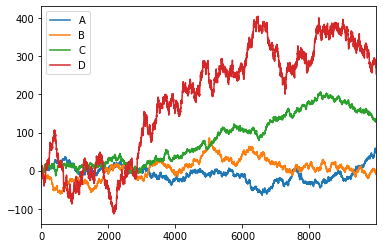

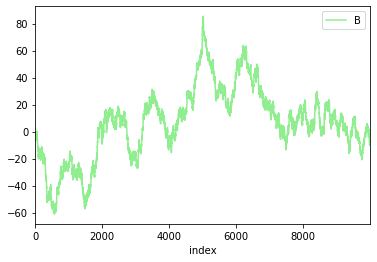

In [18]:
# Line plots
ds_cumsum.drop('index', axis=1).plot() # do all columns
ds_cumsum.plot(x='index',y='B', color='lightgreen')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000006C7A1FDE88>,
      dtype=object)

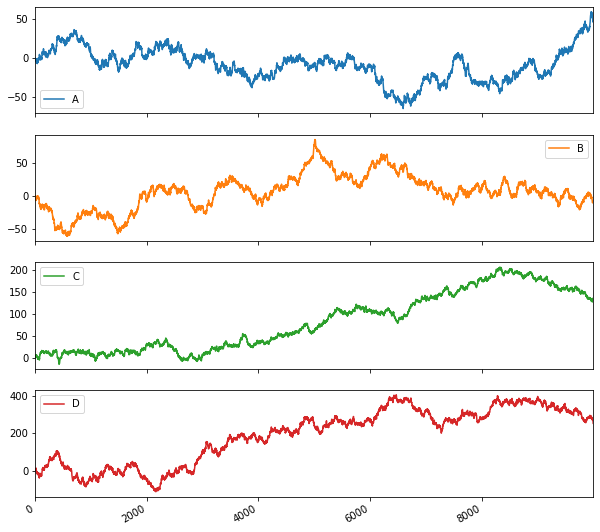

In [21]:
# make each column a separate plot
ds_cumsum.drop('index', axis=1).plot(subplots=True, figsize=(10,10))

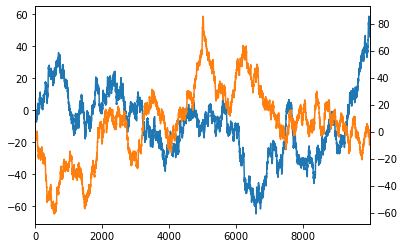

In [22]:
plt.figure()
ds_cumsum.A.plot()                  # plot on column A
ds_cumsum.B.plot(secondary_y=True)  # plot on column B

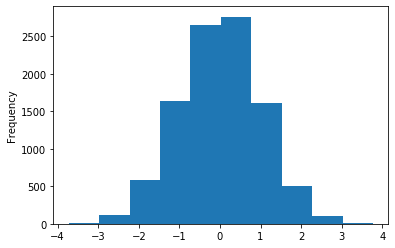

In [23]:
# Histograms (on column A)
ds.A.plot.hist()

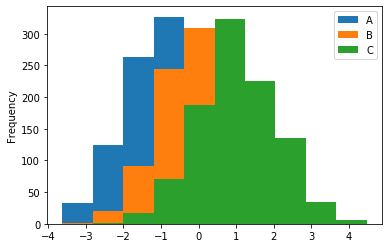

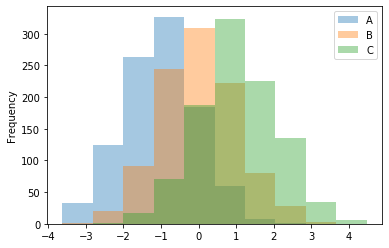

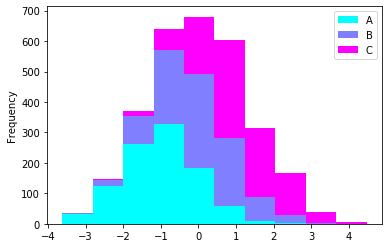

In [27]:
# specific dataset for overlap histogram
ds_hist = pd.DataFrame({'A':np.random.randn(1000)-1,
                        'B':np.random.randn(1000),
                        'C':np.random.randn(1000)+1}) 
ds_hist.plot.hist()

# by using alpha parameter we can set transparency
ds_hist.plot.hist(alpha=.4)

# we can stack the histograms too
ds_hist.plot.hist(stacked=True, colormap='cool')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006C007DBE08>,
      dtype=object)

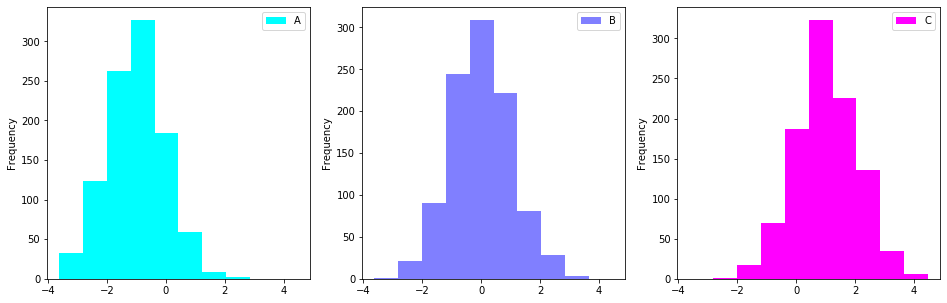

In [28]:
# hist with subplots
ds_hist.plot.hist(subplots=True, layout=(1,3), figsize=(16,5), colormap='cool')

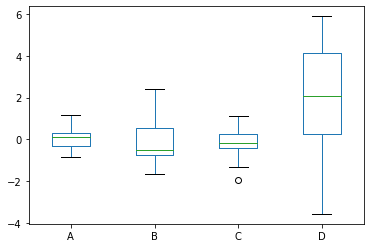

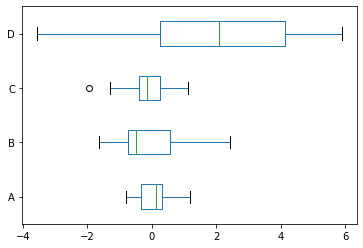

In [12]:
# Boxplots
small_ds.plot.box() # default vertical
small_ds.plot.box(vert=False) # horizontal

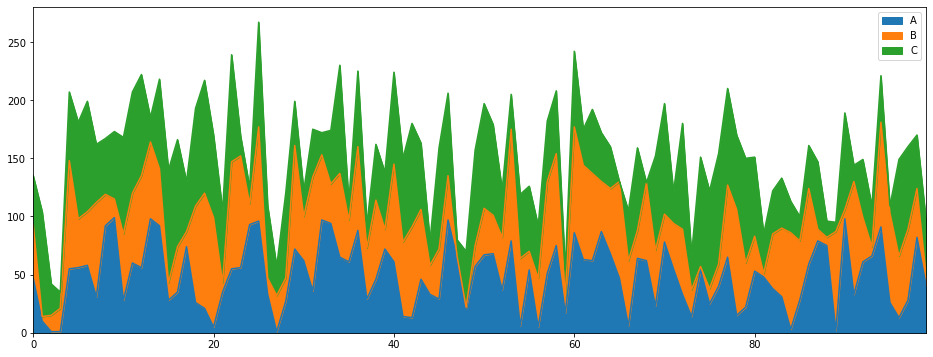

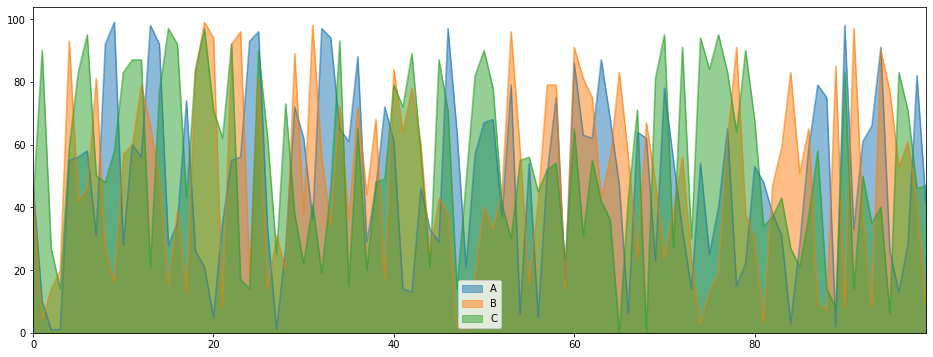

In [29]:
# Area plots
ds_natural.plot.area(figsize=(16,6))
ds_natural.plot.area(stacked=False, figsize=(16,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006C00E68848>,
      dtype=object)

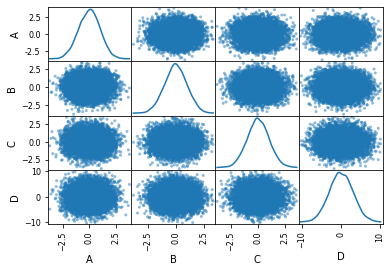

In [34]:
from pandas.plotting import scatter_matrix

# similar to pair plot in seaborn
scatter_matrix(ds, diagonal='kde')

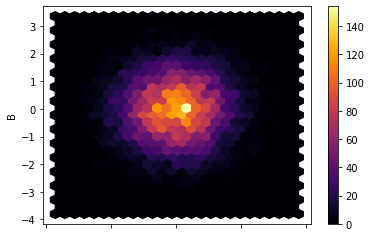

In [33]:
# density 
ds.plot.hexbin(x='A',y='B', gridsize=25, colormap='inferno')